# Visualize embeddings: Visualize individual tokens

Some models to try:
- openai/gpt-oss-20b, openai/gpt-oss-120b
- google/gemma-3-27b-it, google/gemma-3-4b-it
- Qwen/Qwen3-4B, Qwen/Qwen3-4B-Instruct-2507, Qwen/Qwen3-4B-Thinking-2507
- allenai/Olmo-3-1025-7B, allenai/Olmo-3-7B-Think-SFT, allenai/Olmo-3-7B-Think-DPO, allenai/Olmo-3-7B-Think, allenai/Olmo-3-7B-Instruct-SFT, allenai/Olmo-3-7B-Instruct-DPO, allenai/Olmo-3-7B-RL-Zero-Math

In [2]:
import torch
import seaborn as sns

from dawnet.inspector import LLMInspector
from dawnet.diagnose.vis_transformer_manifold import ManifoldExperiment
from dawnet.prompts import get_words
torch.set_grad_enabled(False)

torch.autograd.grad_mode.set_grad_enabled(mode=False)

In [3]:
model_id = "openai/gpt-oss-20b"
insp = LLMInspector.from_hf(model_id)
insp.model

Using MXFP4 quantized models requires a GPU, we will default to dequantizing the model to bf16


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

GptOssForCausalLM(
  (model): GptOssModel(
    (embed_tokens): Embedding(201088, 2880, padding_idx=199999)
    (layers): ModuleList(
      (0-23): 24 x GptOssDecoderLayer(
        (self_attn): GptOssAttention(
          (q_proj): Linear(in_features=2880, out_features=4096, bias=True)
          (k_proj): Linear(in_features=2880, out_features=512, bias=True)
          (v_proj): Linear(in_features=2880, out_features=512, bias=True)
          (o_proj): Linear(in_features=4096, out_features=2880, bias=True)
        )
        (mlp): GptOssMLP(
          (router): GptOssTopKRouter()
          (experts): GptOssExperts()
        )
        (input_layernorm): GptOssRMSNorm((2880,), eps=1e-05)
        (post_attention_layernorm): GptOssRMSNorm((2880,), eps=1e-05)
      )
    )
    (norm): GptOssRMSNorm((2880,), eps=1e-05)
    (rotary_emb): GptOssRotaryEmbedding()
  )
  (lm_head): Linear(in_features=2880, out_features=201088, bias=False)
)

In [4]:
word_lists = get_words()
print(word_lists)

{'boy_first_names': [' James', ' John', ' Michael', ' David', ' Daniel', ' Matthew', ' Andrew', ' Thomas', ' Mark', ' Paul', ' Peter', ' Kevin', ' Brian'], 'girl_first_names': [' Mary', ' Sarah', ' Emma', ' Emily', ' Jessica', ' Anna', ' Laura', ' Lisa', ' Jennifer', ' Karen', ' Amy', ' Rachel', ' Susan'], 'countries': [' France', ' Spain', ' Italy', ' Japan', ' China', ' Brazil', ' Canada', ' Mexico', ' India', ' Egypt', ' Greece', ' Turkey', ' Peru'], 'capitals': [' Paris', ' London', ' Rome', ' Tokyo', ' Berlin', ' Madrid', ' Ottawa', ' Cairo', ' Athens', ' Moscow', ' Beijing', ' Delhi', ' Lima'], 'colors': [' red', ' blue', ' green', ' yellow', ' orange', ' purple', ' pink', ' brown', ' black', ' white', ' gray', ' silver', ' gold'], 'months': [' January', ' February', ' March', ' April', ' May', ' June', ' July', ' August', ' September', ' October', ' November', ' December'], 'emotions': [' happy', ' sad', ' angry', ' excited', ' scared', ' surprised', ' confused', ' proud', ' wor

In [5]:
exp = ManifoldExperiment(insp)
for _c, _w in word_lists.items():
    for _e in _w:
        exp.add_phrase(_e, label=_c, skip_add_bos=False)

exp.collect_activations(embed_name="model.embed_tokens", layers=insp.get_layers(name_regex=r"^model.layers.\d+$"))
exp.build_coordinates()

Added to layer ['model.embed_tokens', 'model.layers.0', 'model.layers.1', 'model.layers.2', 'model.layers.3', 'model.layers.4', 'model.layers.5', 'model.layers.6', 'model.layers.7', 'model.layers.8', 'model.layers.9', 'model.layers.10', 'model.layers.11', 'model.layers.12', 'model.layers.13', 'model.layers.14', 'model.layers.15', 'model.layers.16', 'model.layers.17', 'model.layers.18', 'model.layers.19', 'model.layers.20', 'model.layers.21', 'model.layers.22', 'model.layers.23']


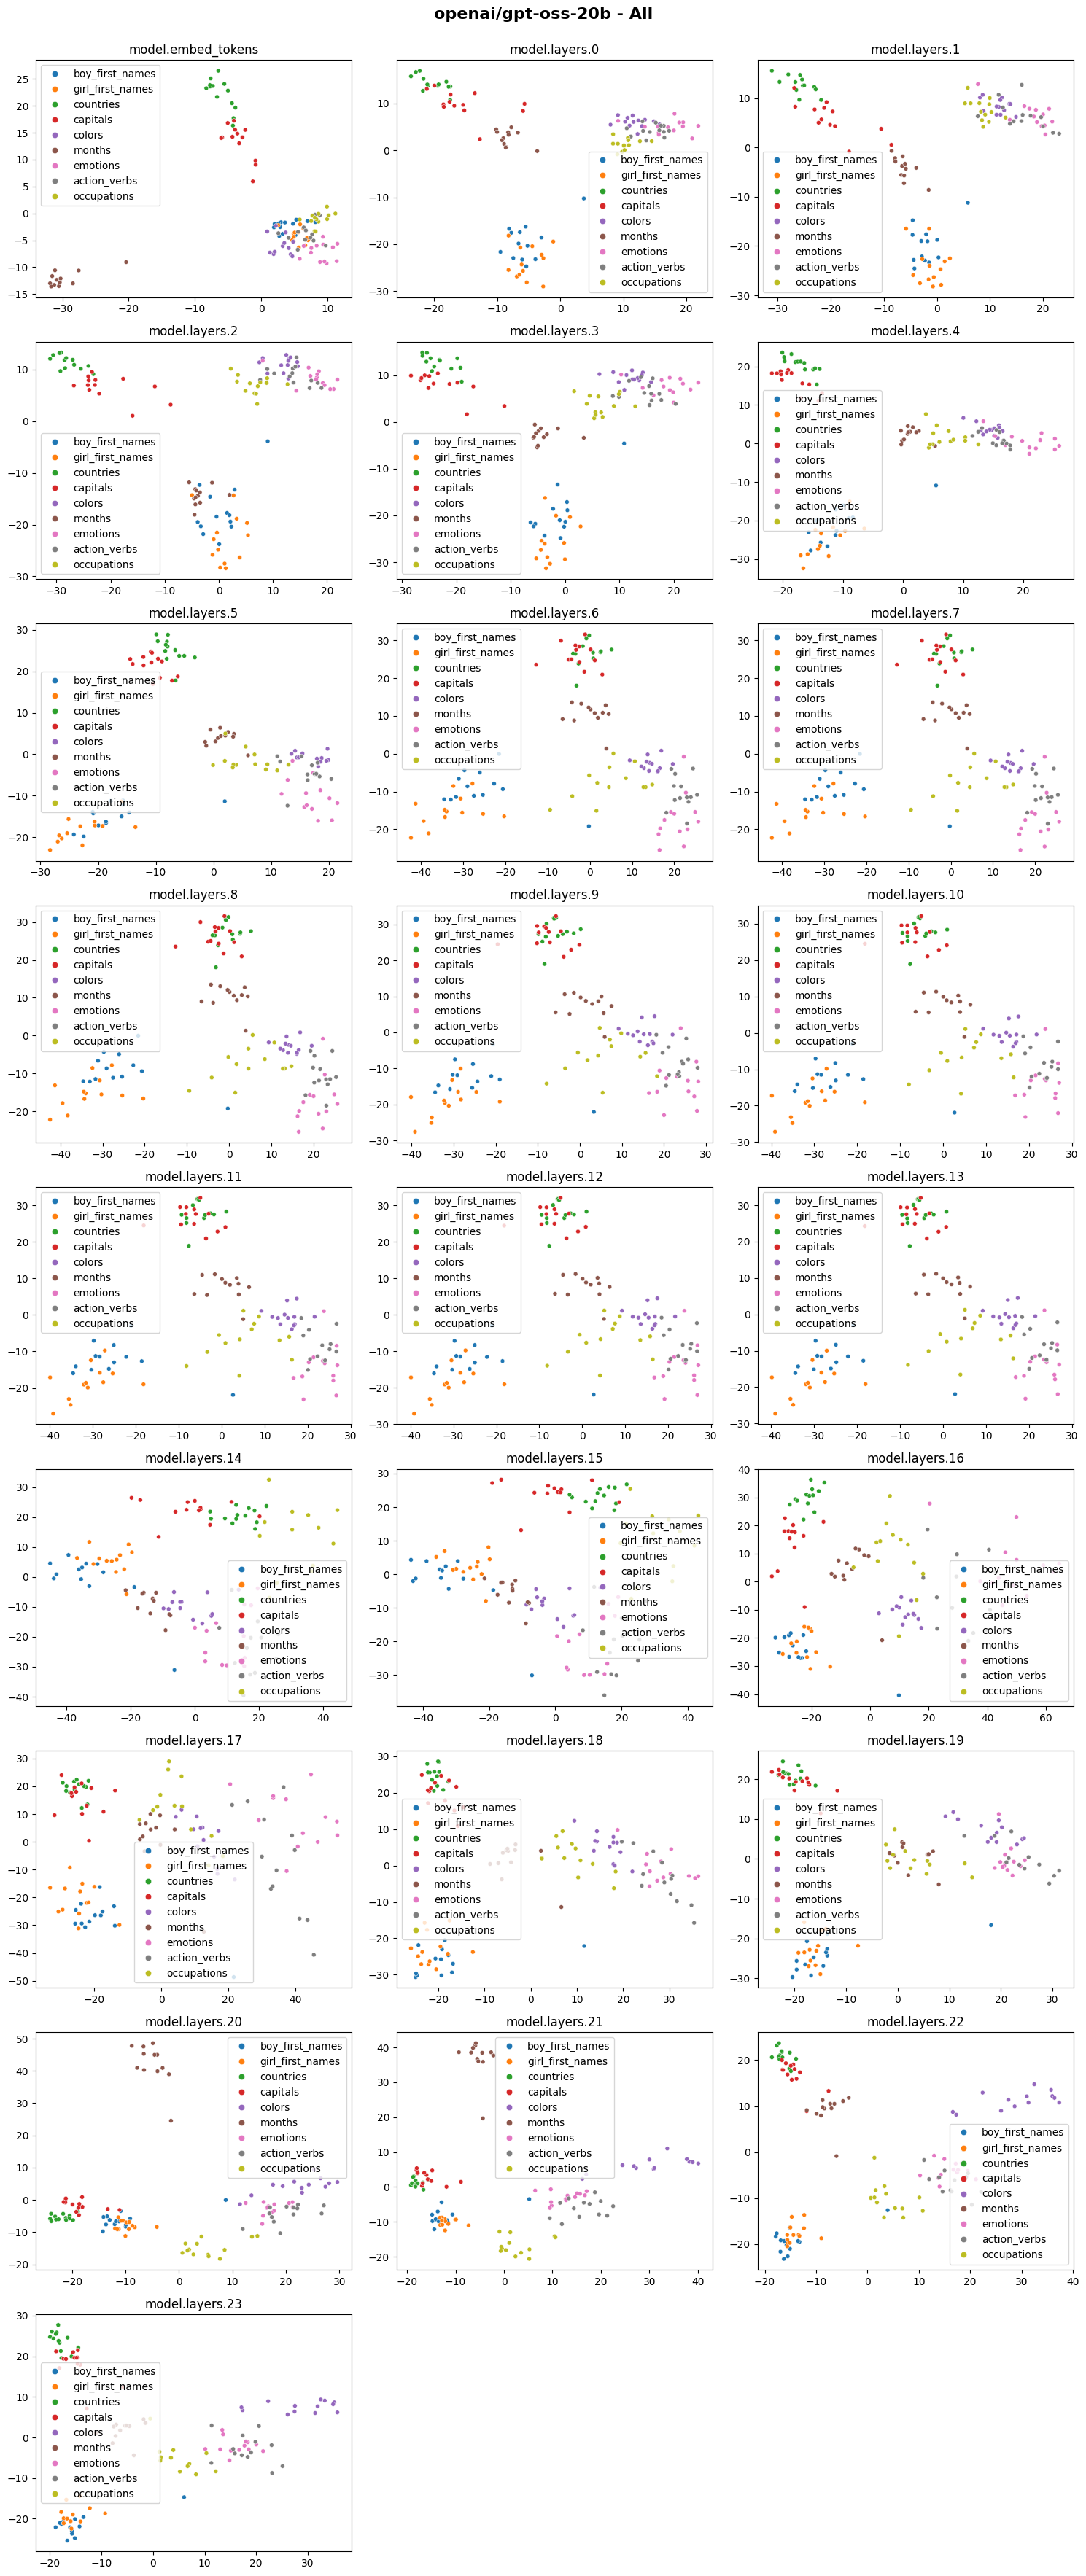

In [7]:
fig = exp.show_notebook()
fig